<a href="https://colab.research.google.com/github/hasancatalgol/level_based_persona/blob/main/level_based_persona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level Based Persona
## Simple Segmentation & Rule Based Classification

## Overview

Our goal is to make groupings for customers that exist individually. Then it is to segment these groups. Finally, it is trying to determine which of these segments a new customer belongs to. **We won't be appling any machine learning algorithms to solve this problem.** Segmentation will be rule based and we will be defining those rules.

### Goal: 
Thinking about the concept of persona.
To be able to define new customers according to the levels.
Simply segment new customer definitions using the qcut function.
When a new customer arrives, classify them according to segments.




---
----

## Part One: Understanding the Background and Data

Source of data is a well-known Turkish clothing company which manufactures clothes for every gender and for every age. The products are decent quality and the main goal of the company is to reach as many people by adjusting the price range affordable

----


### The Data

There are two different tables showing the characteristics and transaction information of the customers.

#### users.csv

-----

`users.csv` contains characteristics of customers

Column | Definition | Type of Variable
:--- | :-----------: | :-----------------:
uid | Unique ID belonging to customers | Numeric
reg_date | Registration dates of customers | Numeric
device | Devices used by customers ( Android, iOS ) | Nominal
gender | Genders of customers | Nominal
country | Countries where customers reside |Nominal
age |  Ages of customers | Numeric

----
----

#### purchases.csv

`purchases.csv` contains transaction information of the customers.

Column | Definiton
:--- | :---------:
uid | Unique ID belonging to every customer
date | Purchase date of customer
price |  Amount spent by customer

**Import libraries**

In [1]:
import warnings
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

**Read "users.csv" and "purchases.csv" files**

In [2]:
users = pd.read_csv('https://github.com/hasancatalgol/level_based_persona/raw/main/Data/users.csv')
purchases = pd.read_csv('https://github.com/hasancatalgol/level_based_persona/raw/main/Data/purchases.csv')

#users = pd.read_csv('Data/users.csv')
#purchases = pd.read_csv('Data/purchases.csv')

**Inner join both data files on "uid"**

In [3]:
df = purchases.merge(users, how = "inner", on = "uid")

**Explore the DataFrame Properties and Head.**

In [4]:
df.head()

,date,uid,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,499,2017-06-26T00:00:00Z,and,M,BRA,17
1,2017-07-15,41195147,499,2017-06-26T00:00:00Z,and,M,BRA,17
2,2017-11-12,41195147,599,2017-06-26T00:00:00Z,and,M,BRA,17
3,2017-09-26,91591874,299,2017-01-05T00:00:00Z,and,M,TUR,17
4,2017-12-01,91591874,599,2017-01-05T00:00:00Z,and,M,TUR,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      9006 non-null   object
 1   uid       9006 non-null   int64 
 2   price     9006 non-null   int64 
 3   reg_date  9006 non-null   object
 4   device    9006 non-null   object
 5   gender    9006 non-null   object
 6   country   9006 non-null   object
 7   age       9006 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 633.2+ KB


## Part Two: Exploring Data Frame

Let's first explore our dataframe and ask relevant questions to understand both tables much better

**How many unique customers are in the dataset?**

In [6]:
df["uid"].nunique()

1322

**How many unique prices in the dataset?**

In [7]:
df["price"].nunique()

6

**What are the total sales for each price tag?**

In [8]:
df["price"].value_counts()

299    2347
499    2242
599    1848
199    1840
899     372
99      357
Name: price, dtype: int64

**What is the total amount of sales for each country?**

In [9]:
df["country"].value_counts()

USA    3650
BRA    2694
DEU     915
TUR     804
FRA     544
CAN     399
Name: country, dtype: int64

**Net sales for each country**

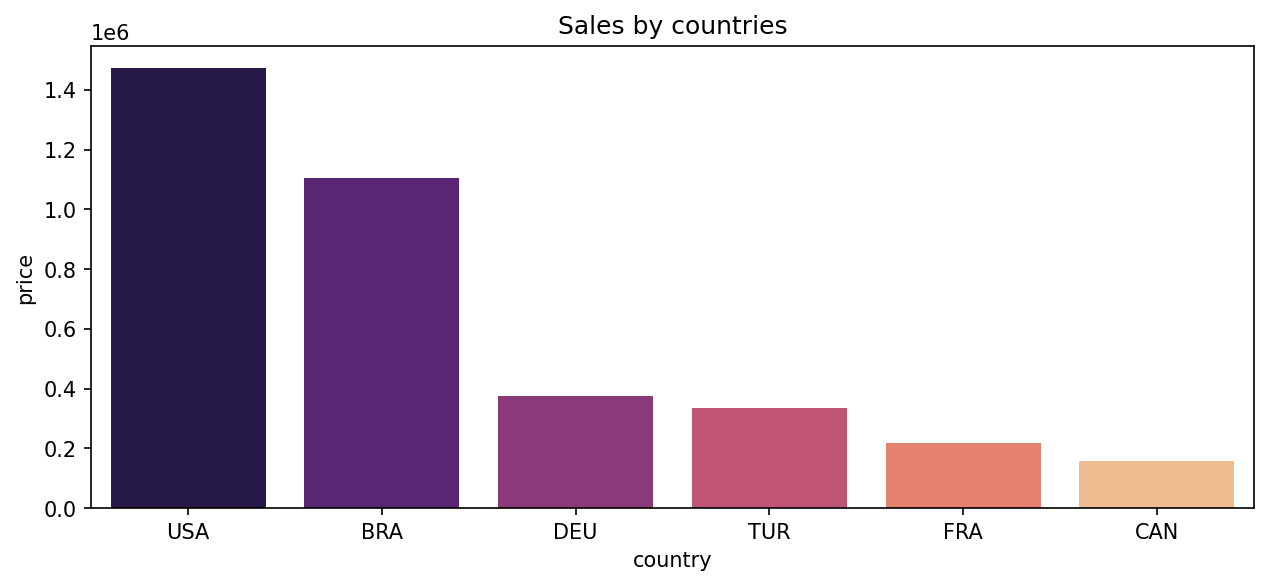

In [10]:
#Plot Configurations
plt.figure(figsize=(10,4),dpi=150)
#Plot Logic
total_sales = df.groupby(["country"]).agg({"price": "sum"}).sort_values('price', ascending=False) 
total_sales.reset_index(inplace=True)
sns.barplot(x='country', y='price', data=total_sales, palette='magma').set(title='Sales by countries');

In [11]:
total_sales

,country,price
0,USA,1473550
1,BRA,1104106
2,DEU,374285
3,TUR,333996
4,FRA,218556
5,CAN,158901


**Net total sales for each OS(Operating System)**

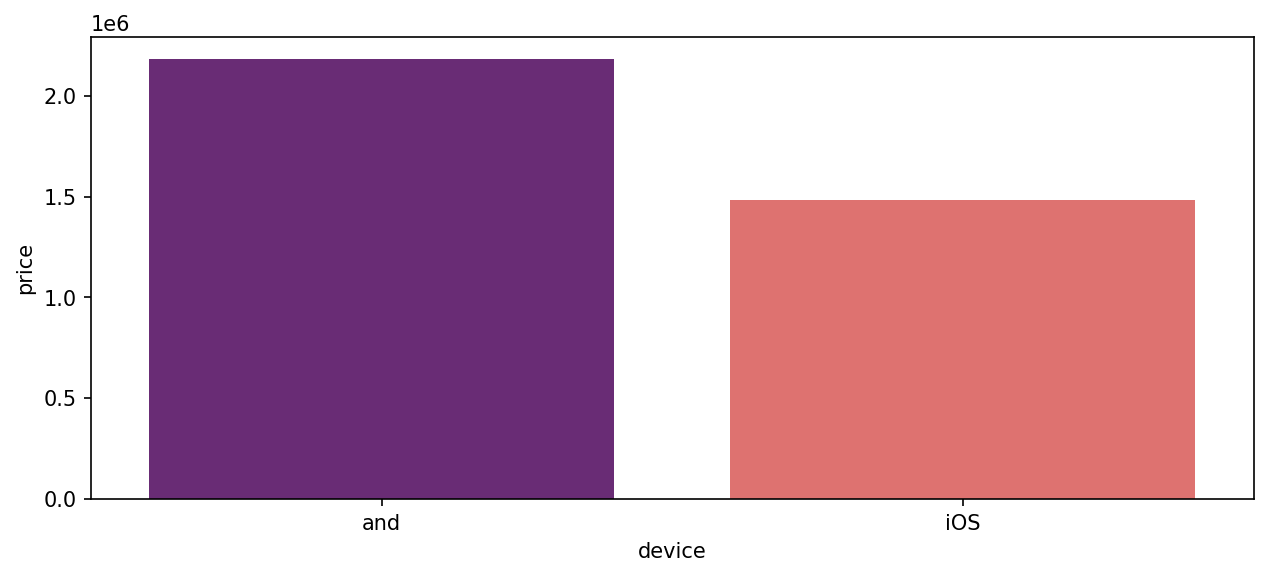

In [12]:
#Plot Configurations
plt.figure(figsize=(10,4),dpi=150)
#Plot Logic
device_price = df.groupby(["device"]).agg({"price": "sum"}).sort_values('price', ascending=False) 
device_price.reset_index(inplace=True)
sns.barplot(x='device', y='price', data=device_price, palette='magma');
plt.show()

**Net mean sales for each OS(Operating System)**

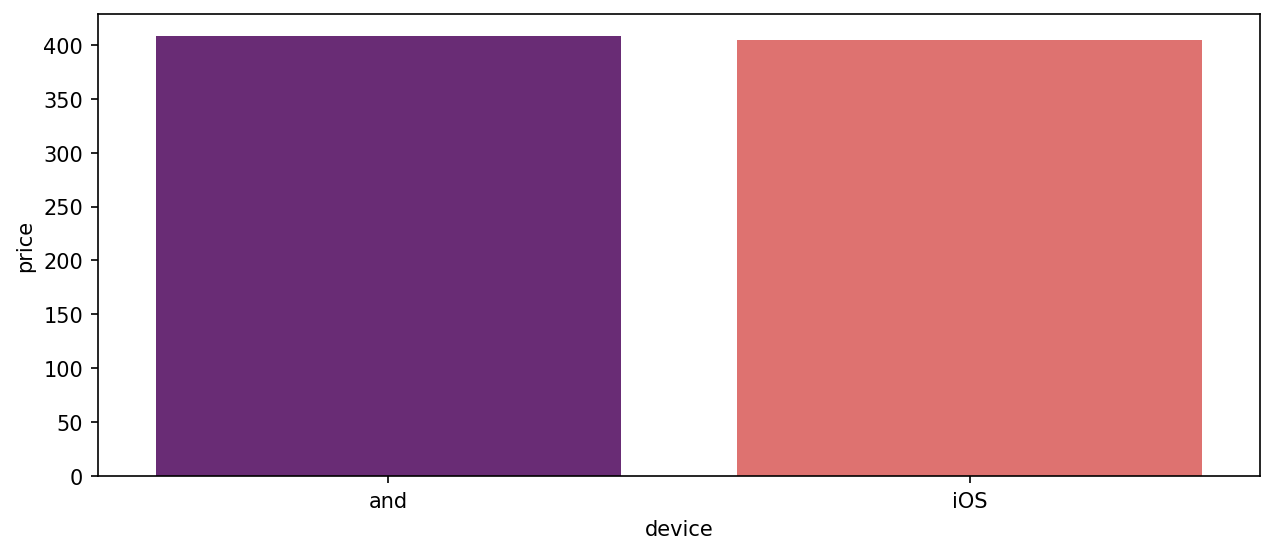

In [13]:
#Plot Configurations
plt.figure(figsize=(10,4),dpi=150)
#Plot Logic
device_price = df.groupby(["device"]).agg({"price": "mean"}).sort_values('price', ascending=False) 
device_price.reset_index(inplace=True)
sns.barplot(x='device', y='price', data=device_price, palette='magma');
plt.show()

**Mean sales by each country**

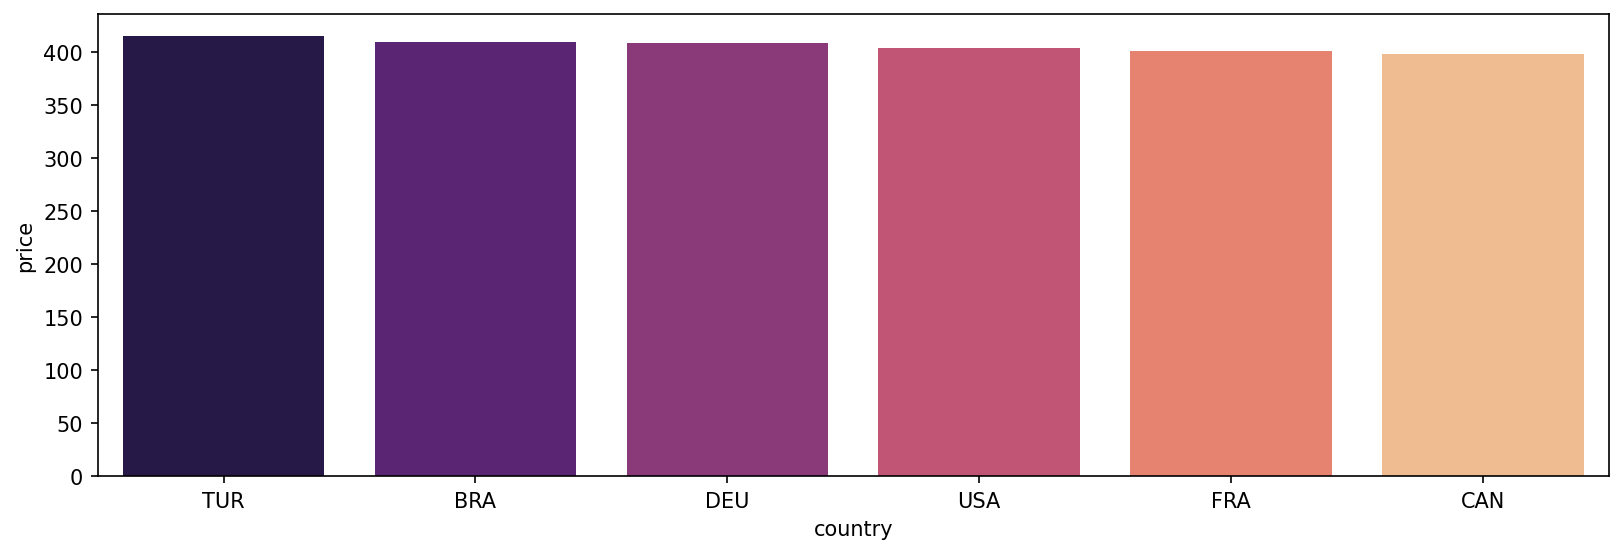

In [14]:
#Plot Configurations
plt.figure(figsize=(13,4),dpi=150)
#Plot Logic
country_sales = df.groupby(["country"]).agg({"price": "mean"}).sort_values('price', ascending=False) 
country_sales.reset_index(inplace=True)
sns.barplot(x='country', y='price', data=country_sales, palette='magma');

**Total earnings in "country", "device", "gender" and "age" breakdown**

In [15]:
agg_df = df.groupby(["country", "device", "gender", "age"]).agg({"price": "mean"}).sort_values("price", ascending = False)
agg_df.reset_index(inplace = True)
agg_df

,country,device,gender,age,price
0,FRA,and,F,24,899.0
1,TUR,and,M,18,899.0
2,BRA,and,M,46,899.0
3,DEU,and,F,51,599.0
4,USA,iOS,M,24,599.0
...,...,...,...,...,...
445,USA,and,F,60,199.0
446,BRA,iOS,F,34,199.0
447,USA,iOS,F,38,199.0
448,TUR,and,M,21,199.0


**Create range of ages as "agg_df" to profile customers more accurately**

In [16]:
agg_df["age_cat"] = pd.cut(agg_df["age"], 
                           [0, 18, 25, 35, 50, 65, 80],
                           labels = ["0_18","18_25","25_35","35_50","50_65","65_80"])
print(agg_df[["age", "age_cat"]].head())

   age age_cat
0   24   18_25
1   18    0_18
2   46   35_50
3   51   50_65
4   24   18_25


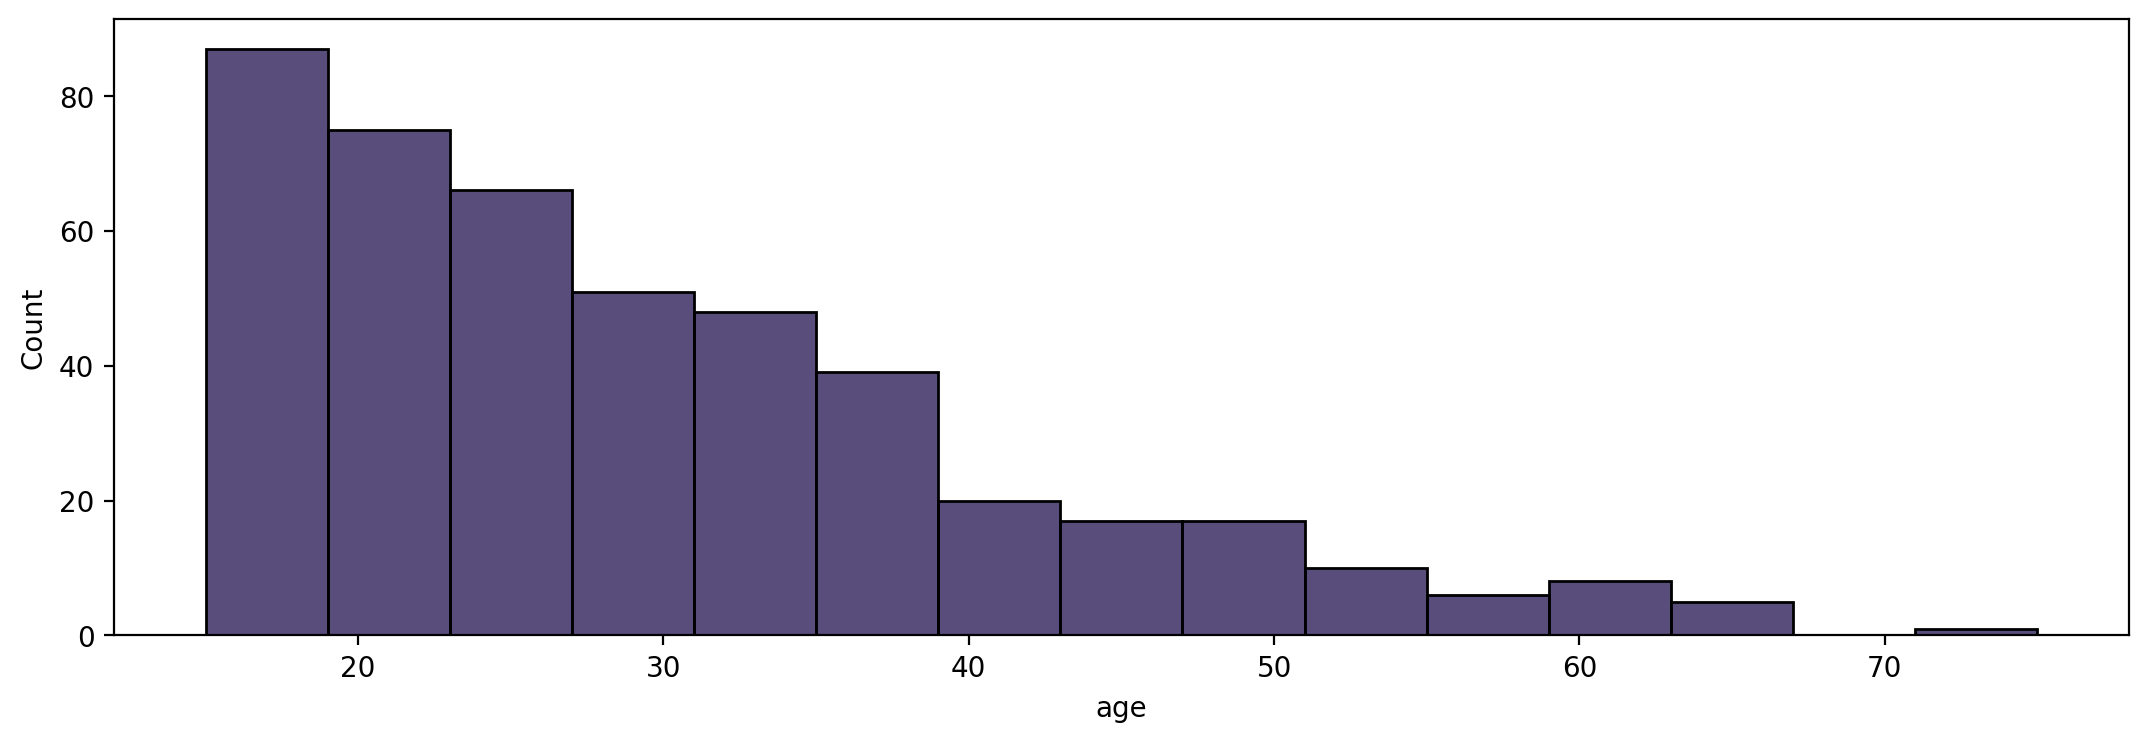

In [17]:
sns.set_palette("magma");
plt.figure(figsize=(13,4),dpi=200)

sns.histplot(agg_df["age"]);

**Create new level based customers and add them into the data set as variables.**

In [18]:
agg_df["customers_level_based"] = [row[0] + "_" + row[1].upper() + "_" + row[2] + "_" + row[5] for row in agg_df.values]
agg_df.head()

,country,device,gender,age,price,age_cat,customers_level_based
0,FRA,and,F,24,899.0,18_25,FRA_AND_F_18_25
1,TUR,and,M,18,899.0,0_18,TUR_AND_M_0_18
2,BRA,and,M,46,899.0,35_50,BRA_AND_M_35_50
3,DEU,and,F,51,599.0,50_65,DEU_AND_F_50_65
4,USA,iOS,M,24,599.0,18_25,USA_IOS_M_18_25


**FinalTable**

In [19]:
agg_df = agg_df[["customers_level_based", "price"]]
agg_df.head()

,customers_level_based,price
0,FRA_AND_F_18_25,899.0
1,TUR_AND_M_0_18,899.0
2,BRA_AND_M_35_50,899.0
3,DEU_AND_F_50_65,599.0
4,USA_IOS_M_18_25,599.0


In [21]:
agg_df = agg_df.groupby("customers_level_based").agg({"price":"mean"})
agg_df = agg_df.reset_index()
agg_df.head(15)

,customers_level_based,price
0,BRA_AND_F_0_18,409.413985
1,BRA_AND_F_18_25,411.395931
2,BRA_AND_F_25_35,396.941857
3,BRA_AND_F_35_50,442.684933
4,BRA_AND_F_50_65,439.000000
5,BRA_AND_M_0_18,421.959226
6,BRA_AND_M_18_25,414.349641
7,BRA_AND_M_25_35,398.845884
8,BRA_AND_M_35_50,484.401003
9,BRA_AND_M_50_65,374.000000


**Segment new customers according to price, add them to agg_df with the segment naming**

In [22]:
agg_df["segment"] = pd.qcut(agg_df["price"], 4, labels=["D", "C", "B", "A"])
agg_df.head()

,customers_level_based,price,segment
0,BRA_AND_F_0_18,409.413985,B
1,BRA_AND_F_18_25,411.395931,B
2,BRA_AND_F_25_35,396.941857,C
3,BRA_AND_F_35_50,442.684933,A
4,BRA_AND_F_50_65,439.000000,A


In [23]:
agg_df["customers_level_based"].value_counts()
agg_df.head()

,customers_level_based,price,segment
0,BRA_AND_F_0_18,409.413985,B
1,BRA_AND_F_18_25,411.395931,B
2,BRA_AND_F_25_35,396.941857,C
3,BRA_AND_F_35_50,442.684933,A
4,BRA_AND_F_50_65,439.000000,A


**Description statistics of the segments**

**EXAMPLE SEGMENTATION**

**Which segment(s) a 42-year-old Turkish woman who uses IOS belongs to?**

In [24]:
new_user = "BRA_AND_F_25_35"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,price,segment
2,BRA_AND_F_25_35,396.941857,C
